## Momento de retroalimentación
Yaritzi Itzayana Nicio Nicolás - A01745837

Se escogió el dataset 'Cataract dataset' de la base de Kaggle que tiene un compilado de 612 imágenes divididas en una carpeta de *train* y *test*.

Este dataset fue elegido debido a que puede ayudar a desarrollar un modelo que detecte cataratas en los ojos de las personas. Se puede implementar en el campo de la medicina y nos puede ayudar a empezar a explorar otros tipos de enfermedades que se pueden llegar a padecer ya sea en humanos o incluso en animales.

In [87]:
#Se importa el dataset de la carpeta de drive

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
file_path = '/content/drive/MyDrive/Momento de retroalimentación: Módulo 2/processed_images'

In [56]:
import os, shutil, pathlib
base_drive_dir = '/content/drive/MyDrive/Momento de retroalimentación: Módulo 2'
new_base_dir = pathlib.Path(base_drive_dir) / "processed_images 2"

In [ ]:
#Se crean los 3 batches de train, validation y test (cada uno con 2 classes diferentes -cataract y normal-)

In [57]:
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 491 files belonging to 2 classes.
Found 123 files belonging to 2 classes.
Found 121 files belonging to 2 classes.


##Modelo

Se inicia una red neuronal convolucional con capas de mas-pooling, convolución y finalizamos con una capa densa con activación sigmoidal,ya que tenemos un problema de clasificación binaria, es decir puede ser catarata o normal.

In [ ]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([keras.Input(shape=(180, 180, 3)),
                          layers.Rescaling(1./255),
                          layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=256, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=256, kernel_size=3, activation="relu"),
                          layers.Flatten(),
                          layers.Dense(1, activation="sigmoid")])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 41, 41, 128)      

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Entrenamos el modelo con datos del training.

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=validation_dataset)

Epoch 1/10
16/16 [==============================] - 14s 261ms/step - loss: 0.6903 - accuracy: 0.5112 - val_loss: 0.6298 - val_accuracy: 0.7391
Epoch 2/10
16/16 [==============================] - 12s 404ms/step - loss: 0.5717 - accuracy: 0.7291 - val_loss: 0.5499 - val_accuracy: 0.6957
Epoch 3/10
16/16 [==============================] - 12s 271ms/step - loss: 0.4082 - accuracy: 0.8350 - val_loss: 0.7349 - val_accuracy: 0.7391
Epoch 4/10
16/16 [==============================] - 12s 402ms/step - loss: 0.3398 - accuracy: 0.8534 - val_loss: 1.0938 - val_accuracy: 0.6957
Epoch 5/10
16/16 [==============================] - 15s 398ms/step - loss: 0.2912 - accuracy: 0.8880 - val_loss: 1.0466 - val_accuracy: 0.7391
Epoch 6/10
16/16 [==============================] - 10s 317ms/step - loss: 0.2525 - accuracy: 0.8798 - val_loss: 0.7466 - val_accuracy: 0.8261
Epoch 7/10
16/16 [==============================] - 12s 277ms/step - loss: 0.2533 - accuracy: 0.9022 - val_loss: 1.6874 - val_accuracy: 0.7391

Graficamos las estadísticas del modelo

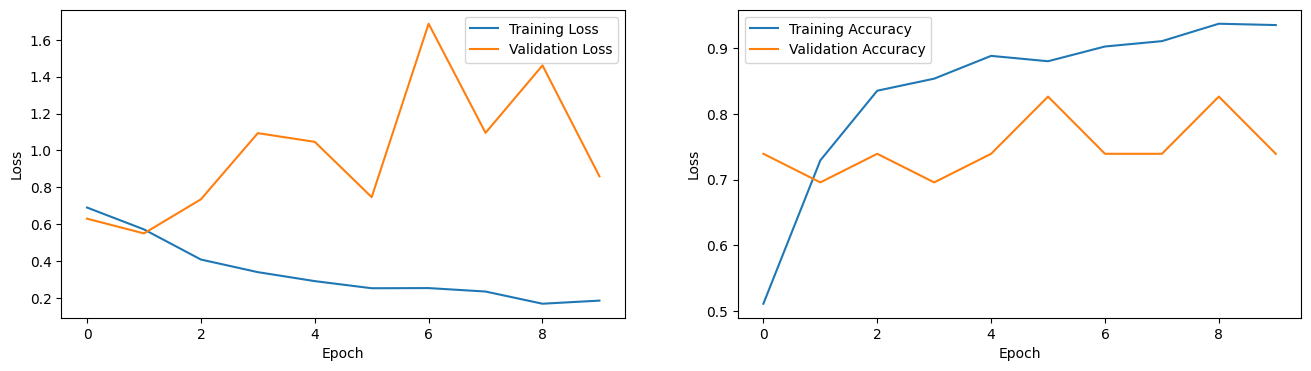

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

4/4 [==============================] - 3s 20ms/step - loss: 0.5175 - accuracy: 0.7603
Test accuracy: 0.760


Con los datos obtenidos en este primer modelo, se puede observar overfitting en el modelo, por lo que se procederá a hacer mejoras en el mismo para poder realizar mejoras. En esta primera implementación se trabajó con un set de datos de validación muy pequeño por lo que primero, se ampliará dicho set manualmente.

##Primera mejora del modelo

Para la primera mejora del modelo se implementan 3 capas de batch normalization después de las capas de MaxPooling para estabilizar un poco el entrenamiento así como una capa de dropout para evitar el overfitting. Se continúa con el mismo número de epochs.

In [ ]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([keras.Input(shape=(180, 180, 3)),
                          layers.Rescaling(1./255),
                          layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=256, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.BatchNormalization(),
                          layers.BatchNormalization(),
                          layers.BatchNormalization(),
                          layers.Conv2D(filters=256, kernel_size=3, activation="relu"),
                          layers.Flatten(),
                          layers.Dropout(0.5),
                          layers.Dense(1, activation="sigmoid")])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 41, 41, 128)      

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=validation_dataset)

Epoch 1/10
16/16 [==============================] - 54s 3s/step - loss: 0.7440 - accuracy: 0.7291 - val_loss: 0.8982 - val_accuracy: 0.5041
Epoch 2/10
16/16 [==============================] - 14s 428ms/step - loss: 0.8589 - accuracy: 0.7739 - val_loss: 0.7272 - val_accuracy: 0.5447
Epoch 3/10
16/16 [==============================] - 16s 654ms/step - loss: 0.4494 - accuracy: 0.8411 - val_loss: 0.7044 - val_accuracy: 0.5610
Epoch 4/10
16/16 [==============================] - 13s 464ms/step - loss: 0.3093 - accuracy: 0.8595 - val_loss: 0.7424 - val_accuracy: 0.5366
Epoch 5/10
16/16 [==============================] - 13s 400ms/step - loss: 0.2777 - accuracy: 0.8859 - val_loss: 0.5424 - val_accuracy: 0.7154
Epoch 6/10
16/16 [==============================] - 15s 630ms/step - loss: 0.1880 - accuracy: 0.9226 - val_loss: 0.6194 - val_accuracy: 0.6585
Epoch 7/10
16/16 [==============================] - 14s 378ms/step - loss: 0.2024 - accuracy: 0.9348 - val_loss: 0.4708 - val_accuracy: 0.7398
Ep

Se grafican las estadísticas del modelo

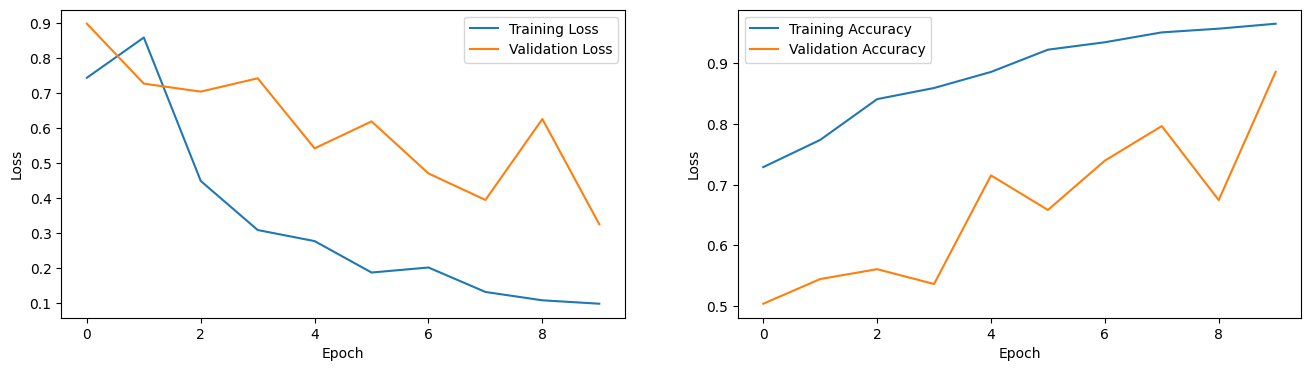

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model.save('cataract.keras',save_format="keras")
print('Model Saved!')

Model Saved!


In [ ]:
test_model = keras.models.load_model('cataract.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

4/4 [==============================] - 4s 22ms/step - loss: 0.2564 - accuracy: 0.9339
Test accuracy: 0.934


Se puede observar overfitting en el modelo lo que nos indica que es probable que el modelo sea complejo para los datos que tenemos.

##Segunda mejora del modelo

Para la segunda mejora del modelo se implementan 3 capas de dropout (Primero dos de 0.2 y luego una de 0.5) para evitar el overfitting. Se mantienen las 3 capas de BN.

In [71]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([keras.Input(shape=(180, 180, 3)),
                          layers.Rescaling(1./255),
                          layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Dropout(0.2),
                          layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Dropout(0.2),
                          layers.Conv2D(filters=256, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.BatchNormalization(),
                          layers.BatchNormalization(),
                          layers.BatchNormalization(),
                          layers.Conv2D(filters=256, kernel_size=3, activation="elu"),
                          layers.Flatten(),
                          layers.Dropout(0.5),
                          layers.Dense(1, activation="sigmoid")])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_55 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 89, 89, 32)        0         
                                                                 
 conv2d_56 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                               

In [72]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [73]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=validation_dataset)

Epoch 1/10
16/16 [==============================] - 16s 349ms/step - loss: 0.7601 - accuracy: 0.7230 - val_loss: 0.8789 - val_accuracy: 0.5041
Epoch 2/10
16/16 [==============================] - 13s 410ms/step - loss: 0.6593 - accuracy: 0.7923 - val_loss: 0.7682 - val_accuracy: 0.5041
Epoch 3/10
16/16 [==============================] - 13s 493ms/step - loss: 0.4715 - accuracy: 0.8208 - val_loss: 0.5879 - val_accuracy: 0.6423
Epoch 4/10
16/16 [==============================] - 12s 396ms/step - loss: 0.5886 - accuracy: 0.8269 - val_loss: 0.5400 - val_accuracy: 0.7398
Epoch 5/10
16/16 [==============================] - 12s 347ms/step - loss: 0.5996 - accuracy: 0.8126 - val_loss: 0.5225 - val_accuracy: 0.7642
Epoch 6/10
16/16 [==============================] - 13s 348ms/step - loss: 0.4908 - accuracy: 0.8513 - val_loss: 0.4989 - val_accuracy: 0.8130
Epoch 7/10
16/16 [==============================] - 13s 451ms/step - loss: 0.3921 - accuracy: 0.8798 - val_loss: 0.4968 - val_accuracy: 0.7561

Se grafican las estadísticas del modelo.

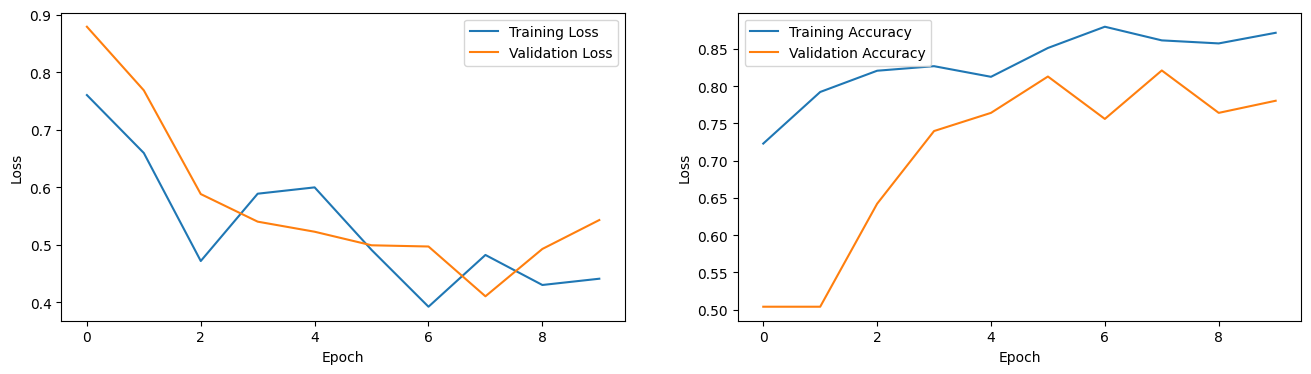

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [75]:
model.save('cataract.keras',save_format="keras")
print('Model Saved!')

Model Saved!


In [76]:
test_model = keras.models.load_model('cataract.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

4/4 [==============================] - 3s 39ms/step - loss: 0.4195 - accuracy: 0.8347
Test accuracy: 0.835


Las gráficas del modelo nos permiten ver una mejora mucho más notoria. Aún así este modelo se podría mejorar con variaciones de otros hiperparámetros como cambiando el optimizador (posiblemente un optimizador "rmsprop") o variando el learning rate.


En comparación con el primer modelo se ve una mejora mucho más notoria, por lo que se procede a hacer predicciones con el conjunto de validación.

## Predicciones


4/4 [==============================] - 4s 110ms/step


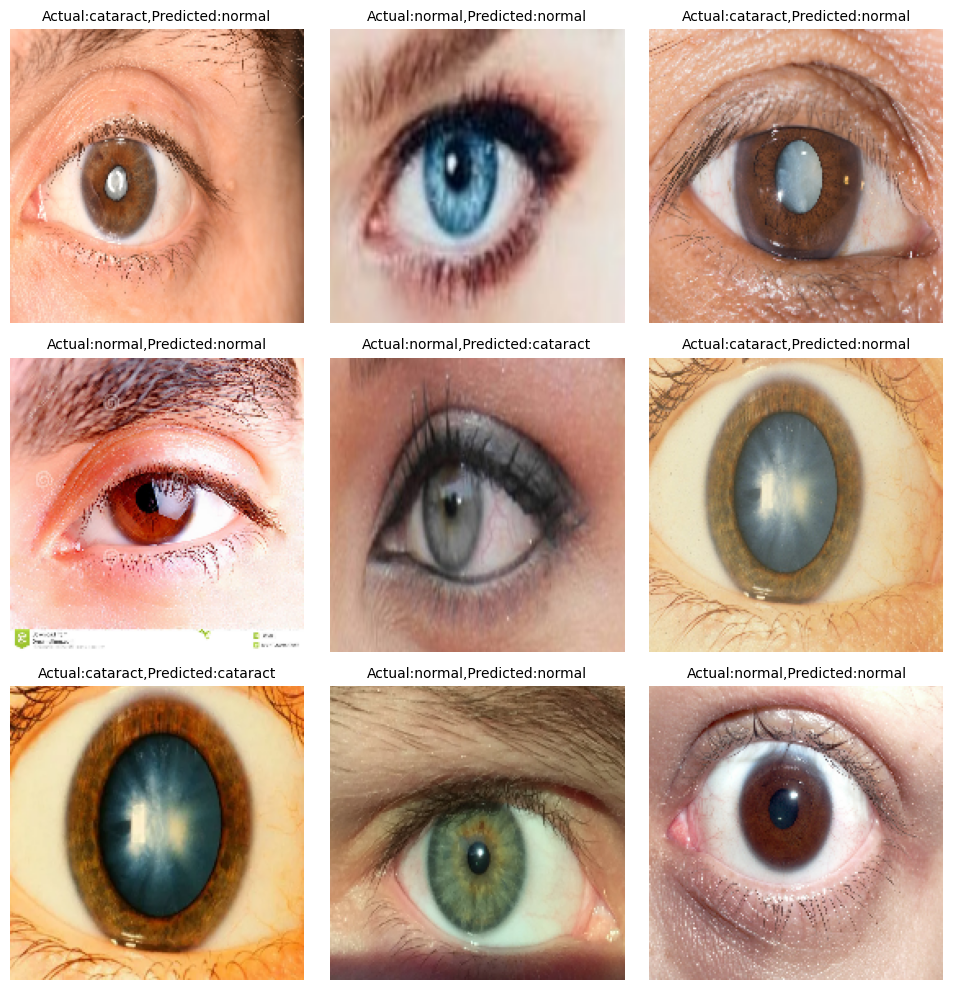

In [86]:
prediction = model.predict(validation_dataset)
prediction_labels = []
for i in prediction:
    if i >0.5:
        prediction_labels.append(1)
    else:
        prediction_labels.append(0)


plt.figure(figsize=(10,10))
for images,labels in validation_dataset.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Actual:{validation_dataset.class_names[labels[i]]},Predicted:{validation_dataset.class_names[prediction_labels[i]]}",fontsize=10)
        plt.axis(False)
        plt.tight_layout()


Se puede observar como puede clasificar mejor a los ojos normales que a los ojos que tienen cataratas. Es probable que sea debido al color de los ojos azules (que tienen cierta semejanza en color a los ojos con cataratas) y al reflejo de la luz que tienen algunos ojos "normales" que se puede confundir con cataratas.